In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [44]:
#El siguiente dataset incluye el codigo de comuna la región y las fechas de cuarentena como datos relevantes para el problema.
CuarentenasTotales = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto29/Cuarentenas-Totales.csv')

In [45]:
#El siguiente dataset incluye el codigo de comuna y la cantidad de pblación que residen en ellas.
PobComuna = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv')

In [46]:
# El dataset incluye muchas columnas las cuales la mayoria son fechas y lo mas relevante para el problema es tener el codigo de comuna y la población, el siguiente codigo deja solo esas 2 columnas
PobComuna = PobComuna[['Codigo comuna','Poblacion']]

In [47]:
# Se revisa el tipo de dato en que estan las columnas donde se aprecia que existen datos null o vacios ademas de las 346 comunas que existen en Chile por lo que hay que eliminarlas.
PobComuna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Codigo comuna  346 non-null    float64
 1   Poblacion      346 non-null    float64
dtypes: float64(2)
memory usage: 5.8 KB


In [48]:
#Se borran los datos que contengan datos NA.
PobComuna = PobComuna.dropna()

In [49]:
#Reviso el formato en que se encuentran los datos y si existen datos null y tambien poder elegir las columnas que seran utiles para el analisis
CuarentenasTotales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 187 non-null    int64  
 1   Nombre             187 non-null    object 
 2   Estado             187 non-null    object 
 3   Alcance            99 non-null     object 
 4   Fecha de Inicio    187 non-null    object 
 5   Fecha de Término   187 non-null    object 
 6   Código CUT Comuna  187 non-null    int64  
 7   Detalle            99 non-null     object 
 8   Superficie en m2   99 non-null     float64
 9   Perímetro en m     99 non-null     float64
 10  Region             187 non-null    int64  
 11  n_REGION           187 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 17.7+ KB


In [50]:
#Selecciono las columnas que seran utiles para el desarrollo del del problema
CuarentenasTotales = CuarentenasTotales[['Region','Nombre','Código CUT Comuna','Fecha de Inicio','Fecha de Término']]

In [51]:
#Se convierte el tipo de dato de Fecha que esta como object a date esto para las columnas de 'Fecha de Inicio' y ' Fecha de Término'
CuarentenasTotales['Fecha de Inicio'] = pd.to_datetime(CuarentenasTotales['Fecha de Inicio'])
CuarentenasTotales['Fecha de Término'] = pd.to_datetime(CuarentenasTotales['Fecha de Término'])

In [52]:
#Para poder combinar los dos dataset por medio de la columna de codigo comuna se requiere que ambas tengan el mismo nombre, es por esto que aqui se renombre las columnas ademas
#de quitarle los espacios a las columnas tipo fecha para poder trabajar mejor con ellas.
CuarentenasTotales = CuarentenasTotales.rename(columns= {'Código CUT Comuna': 'Codigo comuna', 'Fecha de Inicio': 'Fecha_de_Inicio', 'Fecha de Término': 'Fecha_de_Término'})

In [53]:
# Utilizando merge y el Codigo de comuna como clave foranea para unir los dos dataset
CuarentenasTotales = CuarentenasTotales.merge(PobComuna,on='Codigo comuna')

In [54]:
# Se revisa si se unio correctamente la información
CuarentenasTotales.head()

,Region,Nombre,Codigo comuna,Fecha_de_Inicio,Fecha_de_Término,Poblacion
0,15,Arica,15101,2020-04-16 22:00:00,2020-05-15 22:00:00,247552.0
1,15,Arica Re-Ingreso urbano,15101,2020-07-14 22:00:00,2020-11-09 05:00:00,247552.0
2,13,Santiago Norte,13101,2020-04-13 05:00:00,2020-05-05 22:00:00,503147.0
3,13,Santiago,13101,2020-03-26 21:00:00,2020-04-13 05:00:00,503147.0
4,13,Santiago Extensión a Total,13101,2020-05-05 22:00:00,2020-08-17 05:00:00,503147.0


In [70]:
Cuarentena_RM = CuarentenasTotales[CuarentenasTotales['Region'] == 13]

In [71]:
# Para graficar y analizar los datos se realiza un rango de datos obteniendo el minimo de la fecha de inicio para el intervalo inferior y el maximo de la fecha de termino para el limite superior.
#Este se deberia haber realizado uno por región ya que esto conllevara a que en regiones que se tiene menos información aparezcan como 0 personas en cuarentena sin embargo puede ser que si exista
# una parte de la población en cuarentena.
RangoData = pd.date_range(Cuarentenas_RM.Fecha_de_Inicio.min(),Cuarentenas_RM.Fecha_de_Término.max())

In [72]:
#Se crea un nuevo datase que incluye el rango de todas las fechas desde el limite inferior has el superio con el maximo de la fecha de término.
Cuarentena_RM = pd.DataFrame(data = RangoData, columns = ['Fecha'])

#Se crea una función que suma la población de la comuna si es que la fecha es mayor que la del dia que comenzo la cuarentena y es menor a la fecha de termino
#Luego se oncluye estos valores al dataset
def sum_pob_cuarentena (date):
    return Cuarentenas_RM[(Cuarentenas_RM['Fecha_de_Inicio']<= date) & (Cuarentenas_RM['Fecha_de_Término'] >= date)][['Poblacion']].sum()
Cuarentena_RM[['Suma_pob_cuarentena']] = Cuarentena_RM['Fecha'].transform(sum_pob_cuarentena)

#Se revisa que el dataset este correcto en este caso es a nivel pais.
Cuarentena_RM

,Fecha,Suma_pob_cuarentena
0,2020-03-26 21:00:00,1604762.0
1,2020-03-27 21:00:00,1604762.0
2,2020-03-28 21:00:00,1604762.0
3,2020-03-29 21:00:00,1604762.0
4,2020-03-30 21:00:00,1604762.0
...,...,...
230,2020-11-11 21:00:00,40171.0
231,2020-11-12 21:00:00,40171.0
232,2020-11-13 21:00:00,40171.0
233,2020-11-14 21:00:00,40171.0


In [98]:
Cuarentena_RM['Fecha'] = pd.to_datetime(Cuarentena_RM['Fecha'])

In [99]:
Cuarentena_RM

,Fecha,Suma_pob_cuarentena
0,2020-03-26,1604762.0
1,2020-03-27,1604762.0
2,2020-03-28,1604762.0
3,2020-03-29,1604762.0
4,2020-03-30,1604762.0
...,...,...
230,2020-11-11,40171.0
231,2020-11-12,40171.0
232,2020-11-13,40171.0
233,2020-11-14,40171.0


In [100]:
Cuarentena_RM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Fecha                235 non-null    datetime64[ns]
 1   Suma_pob_cuarentena  235 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.8 KB


Text(0.5, 1.0, 'Pais')

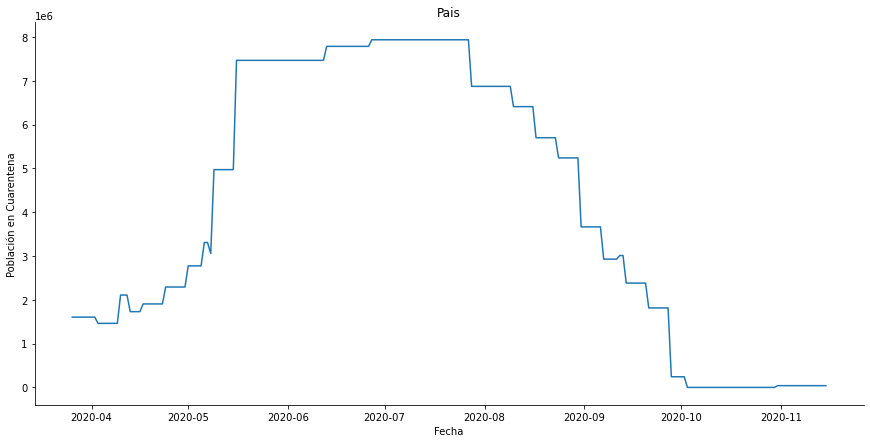

In [101]:
#Se obtinene el gráfico de la cantidad de personas en cuarentena en la RM.
sns.relplot(data = Cuarentena_RM, x = "Fecha", y ='Suma_pob_cuarentena',
    height=6, aspect=2, kind="line").set_axis_labels('Fecha', 'Población en Cuarentena')
plt.title('Pais')

In [102]:
#Se importa el dataset de movilidad de google en donde entrega un error para incorporar low_memory = False
movilidad = pd.read_csv("Global_Mobility_Report.csv", sep=',', low_memory = False)

In [103]:
#Se observa que la lectura del dataset sea correcta.
movilidad.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [104]:
#Como se tenia la información de movilidad de todo el mundo se filtran solamente para obtener los que corresponden a Chile.
movilidad = movilidad[movilidad["country_region_code"] == "CL"]

In [105]:
movilidad.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2203786,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-15,2.0,4.0,9.0,0.0,-3.0,0.0
2203787,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-16,3.0,5.0,5.0,4.0,-1.0,0.0
2203788,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-17,1.0,6.0,11.0,-3.0,-8.0,1.0
2203789,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-18,0.0,5.0,13.0,-3.0,-7.0,1.0
2203790,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-19,0.0,8.0,11.0,-3.0,-7.0,1.0


In [106]:
#Se identifican los datos que existen en la columna sub_region_1 para poder averiguar que contienen para poder filtar los datos de la RM.
pd.unique(movilidad['sub_region_1'])

array([nan, 'Antofagasta', 'Araucania', 'Arica y Parinacota', 'Atacama',
       'Aysén', 'Bio Bio', 'Coquimbo', 'Los Lagos', 'Los Ríos',
       'Magallanes and Chilean Antarctica', 'Maule', 'Ñuble', "O'Higgins",
       'Santiago Metropolitan Region', 'Tarapacá', 'Valparaíso'],
      dtype=object)

In [107]:
#Se identifican los datos que existen en la columna sub_region_2 para poder averiguar que contienen para poder filtar los datos de la RM.
pd.unique(movilidad['sub_region_2'])

array([nan, 'Antofagasta Province', 'El Loa', 'Tocopilla Province',
       'Cautín Province', 'Malleco Province', 'Arica Province',
       'Chañaral Province', 'Copiapó Province', 'Huasco Province',
       'Aysén Province', 'Capitán Prat Province', 'Coyhaique Province',
       'General Carrera Province', 'Arauco Province', 'Bío Bío Province',
       'Concepción Province', 'Choapa Province', 'Elqui Province',
       'Limarí Province', 'Chiloé Province', 'Llanquihue Province',
       'Osorno Province', 'Palena Province', 'El Ranco Province',
       'Valdivia Province', 'Magallanes Province',
       'Tierra del Fuego Province', 'Última Esperanza',
       'Cauquenes Province', 'Curicó Province', 'Linares Province',
       'Talca Province', 'Diguillín Province', 'Itata Province',
       'Punilla Province', 'Cachapoal', 'Cardenal Caro', 'Colchagua',
       'Chacabuco Province', 'Cordillera Province', 'Maipo Province',
       'Melipilla Province', 'Santiago Province', 'Talagante Province',
  

In [108]:
#Luego al identificar que para filtrar por región se tiene que en sub_region_1 se encuentra la RM.
movilidad = movilidad[movilidad["sub_region_1"] == "Santiago Metropolitan Region"]

In [109]:
#Se rectifica que se realizaron los cambios.
movilidad.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2237926,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-15,-10.0,-7.0,-9.0,-7.0,-4.0,0.0
2237927,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-16,-6.0,-3.0,-12.0,-2.0,0.0,-1.0
2237928,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-17,-8.0,-3.0,-10.0,-8.0,-9.0,1.0
2237929,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-18,-9.0,-4.0,-10.0,-8.0,-8.0,1.0
2237930,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-19,-8.0,-4.0,-10.0,-8.0,-8.0,1.0


In [110]:
#Se revisan como estan guardadas las variables la mas importante es la de la fecha.
movilidad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4634 entries, 2237926 to 2242559
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country_region_code                                 4634 non-null   object 
 1   country_region                                      4634 non-null   object 
 2   sub_region_1                                        4634 non-null   object 
 3   sub_region_2                                        3972 non-null   object 
 4   metro_area                                          0 non-null      object 
 5   iso_3166_2_code                                     662 non-null    object 
 6   census_fips_code                                    0 non-null      float64
 7   place_id                                            4634 non-null   object 
 8   date                                                4634 non-null   o

In [111]:
#Como la fecha es de tipo datetime sino mas bien object se procede a cambiarle el formato.
movilidad["date"] = pd.to_datetime(movilidad["date"])

In [112]:
#Se corrobora que se realizo el cambio correctamente.
movilidad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4634 entries, 2237926 to 2242559
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   country_region_code                                 4634 non-null   object        
 1   country_region                                      4634 non-null   object        
 2   sub_region_1                                        4634 non-null   object        
 3   sub_region_2                                        3972 non-null   object        
 4   metro_area                                          0 non-null      object        
 5   iso_3166_2_code                                     662 non-null    object        
 6   census_fips_code                                    0 non-null      float64       
 7   place_id                                            4634 non-null   object        
 8  

In [113]:
movilidad = movilidad.drop(columns = ['place_id',"census_fips_code", "iso_3166_2_code",
                                    "metro_area", "sub_region_2","country_region_code","country_region"])

In [114]:
movilidad.head()

,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2237926,Santiago Metropolitan Region,2020-02-15,-10.0,-7.0,-9.0,-7.0,-4.0,0.0
2237927,Santiago Metropolitan Region,2020-02-16,-6.0,-3.0,-12.0,-2.0,0.0,-1.0
2237928,Santiago Metropolitan Region,2020-02-17,-8.0,-3.0,-10.0,-8.0,-9.0,1.0
2237929,Santiago Metropolitan Region,2020-02-18,-9.0,-4.0,-10.0,-8.0,-8.0,1.0
2237930,Santiago Metropolitan Region,2020-02-19,-8.0,-4.0,-10.0,-8.0,-8.0,1.0


In [115]:
movilidad = movilidad.rename(columns= {'sub_region_1': 'Region',  'date': 'Fecha'})

In [116]:
movilidad.head()

,Region,Fecha,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2237926,Santiago Metropolitan Region,2020-02-15,-10.0,-7.0,-9.0,-7.0,-4.0,0.0
2237927,Santiago Metropolitan Region,2020-02-16,-6.0,-3.0,-12.0,-2.0,0.0,-1.0
2237928,Santiago Metropolitan Region,2020-02-17,-8.0,-3.0,-10.0,-8.0,-9.0,1.0
2237929,Santiago Metropolitan Region,2020-02-18,-9.0,-4.0,-10.0,-8.0,-8.0,1.0
2237930,Santiago Metropolitan Region,2020-02-19,-8.0,-4.0,-10.0,-8.0,-8.0,1.0


In [117]:
movilidad_cuarentena = movilidad.merge(Cuarentena_RM,on='Fecha')

In [127]:
movilidad_cuarentena.head()

,Region,Fecha,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Suma_pob_cuarentena
0,Santiago Metropolitan Region,2020-03-26,-56.0,-14.0,-46.0,-54.0,-46.0,26.0,1604762.0
1,Santiago Metropolitan Region,2020-03-26,-34.0,-16.0,-36.0,-29.0,-37.0,25.0,1604762.0
2,Santiago Metropolitan Region,2020-03-26,-53.0,-29.0,-36.0,-48.0,-42.0,25.0,1604762.0
3,Santiago Metropolitan Region,2020-03-26,-51.0,-25.0,-33.0,-40.0,-35.0,23.0,1604762.0
4,Santiago Metropolitan Region,2020-03-26,-53.0,-28.0,-41.0,-49.0,-33.0,20.0,1604762.0


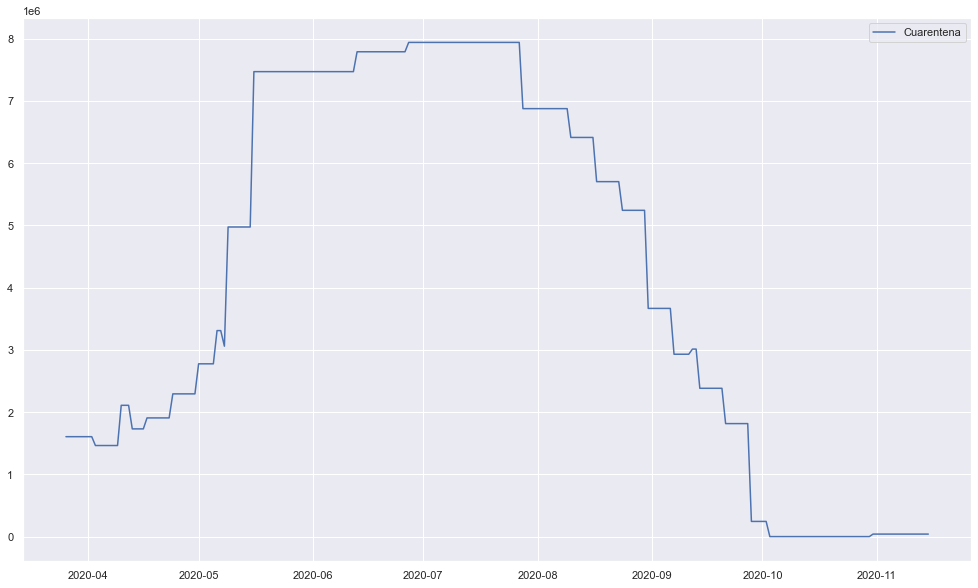

In [179]:
plt.figure(figsize=(17,10))
x = movilidad_cuarentena[["Fecha"]]
plt.plot(x,y3,color ="b", label="Cuarentena")
plt.legend()
plt.show()

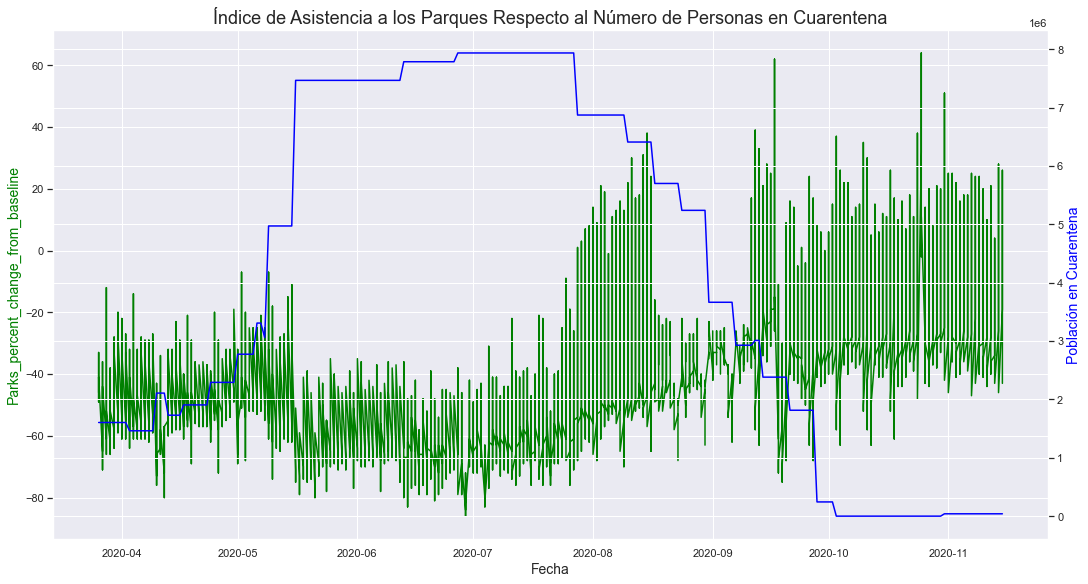

In [293]:
fig,ax = plt.subplots(figsize=(15,8), constrained_layout=True)
ax.plot(movilidad_cuarentena.Fecha, movilidad_cuarentena.parks_percent_change_from_baseline, color="green")
ax.set_xlabel("Fecha",fontsize=14)
ax.set_ylabel("Parks_percent_change_from_baseline",fontsize=14, color="green")
ax2=ax.twinx()
ax2.plot(movilidad_cuarentena.Fecha, movilidad_cuarentena.Suma_pob_cuarentena ,color="blue")
ax2.set_ylabel("Población en Cuarentena",color="blue",fontsize=14)
plt.title("Índice de Asistencia a los Parques Respecto al Número de Personas en Cuarentena", fontsize = 18)
plt.show()

In [290]:
#Se puede apreciar que en las fechas donde se  tiene un mayor numero de personas en cuarentena la asistencia a los parques disminuye.

In [250]:
movilidad_apple = pd.read_csv("applemobilitytrends-2021-12-09.csv", sep=',', low_memory = False)

In [251]:
movilidad_apple.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,152.35,151.20,141.39,163.52,172.67,162.12,156.23,150.23,171.58,159.52
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,181.32,224.26,210.36,215.39,214.93,156.72,191.94,208.66,244.65,203.88
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,93.26,100.08,104.56,135.03,146.15,91.97,97.89,128.10,98.74,115.38
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,94.21,99.95,103.63,125.52,123.87,71.43,102.94,122.42,84.15,114.29
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,128.27,130.51,135.67,143.79,113.66,121.15,124.25,128.52,138.88,146.07


In [252]:
#Se filtra solamente la region de Santiago en el dataset
movilidad_apple = movilidad_apple[movilidad_apple["region"] == 'Santiago']

In [253]:
#Se puede apreciar que existen dos tipos de transporte, caminando y manejando.
movilidad_apple.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09
791,city,Santiago,driving,Santiago de Chile,Santiago Metropolitan Region,Chile,100.0,101.96,105.49,107.92,...,109.77,116.10,115.88,154.11,134.38,84.19,115.82,140.95,94.69,135.45
792,city,Santiago,walking,Santiago de Chile,Santiago Metropolitan Region,Chile,100.0,104.69,106.20,105.99,...,106.98,115.78,111.88,137.30,109.89,62.87,115.53,132.06,80.57,131.39


In [254]:
#Nos quedamos solamnete con lo relevante que es el indice, y el tipo de transporte y la fecha la cual se coloca como columna.
movilidad_apple = movilidad_apple.melt(id_vars=['transportation_type', 'geo_type',
                                                'region', 'alternative_name','sub-region', 'country'],
                                       var_name="fecha", value_name="indice")
movilidad_apple.head()

,transportation_type,geo_type,region,alternative_name,sub-region,country,fecha,indice
0,driving,city,Santiago,Santiago de Chile,Santiago Metropolitan Region,Chile,2020-01-13,100.00
1,walking,city,Santiago,Santiago de Chile,Santiago Metropolitan Region,Chile,2020-01-13,100.00
2,driving,city,Santiago,Santiago de Chile,Santiago Metropolitan Region,Chile,2020-01-14,101.96
3,walking,city,Santiago,Santiago de Chile,Santiago Metropolitan Region,Chile,2020-01-14,104.69
4,driving,city,Santiago,Santiago de Chile,Santiago Metropolitan Region,Chile,2020-01-15,105.49


In [255]:
movilidad_apple =movilidad_apple.drop(columns= ['geo_type', 'region', 'alternative_name',
                                                'sub-region', 'country'])

In [256]:
movilidad_apple.head()

,transportation_type,fecha,indice
0,driving,2020-01-13,100.00
1,walking,2020-01-13,100.00
2,driving,2020-01-14,101.96
3,walking,2020-01-14,104.69
4,driving,2020-01-15,105.49


In [257]:
movilidad_apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transportation_type  1394 non-null   object 
 1   fecha                1394 non-null   object 
 2   indice               1388 non-null   float64
dtypes: float64(1), object(2)
memory usage: 32.8+ KB


In [258]:
#Se realiza el cambio de formato fecha a tipo datetime debido a que antes era de tipo object y se corrobora el cambio
movilidad_apple["fecha"] = pd.to_datetime(movilidad_apple["fecha"])
movilidad_apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   transportation_type  1394 non-null   object        
 1   fecha                1394 non-null   datetime64[ns]
 2   indice               1388 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 32.8+ KB


In [259]:
movilidad_apple = movilidad_apple.rename(columns= {'fecha': 'Fecha'})
movilidad_apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   transportation_type  1394 non-null   object        
 1   Fecha                1394 non-null   datetime64[ns]
 2   indice               1388 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 32.8+ KB


In [260]:
movilidad_apple = movilidad_apple.merge(Cuarentena_RM,on='Fecha')
movilidad_apple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 469
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   transportation_type  470 non-null    object        
 1   Fecha                470 non-null    datetime64[ns]
 2   indice               466 non-null    float64       
 3   Suma_pob_cuarentena  470 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 18.4+ KB


In [261]:
movilidad_apple.head()

,transportation_type,Fecha,indice,Suma_pob_cuarentena
0,driving,2020-03-26,48.12,1604762.0
1,walking,2020-03-26,28.62,1604762.0
2,driving,2020-03-27,26.70,1604762.0
3,walking,2020-03-27,13.69,1604762.0
4,driving,2020-03-28,21.34,1604762.0


In [271]:
movilidad_caminando = movilidad_apple[movilidad_apple["transportation_type"] == "walking"]
movilidad_manejando = movilidad_apple[movilidad_apple["transportation_type"] == "driving"]

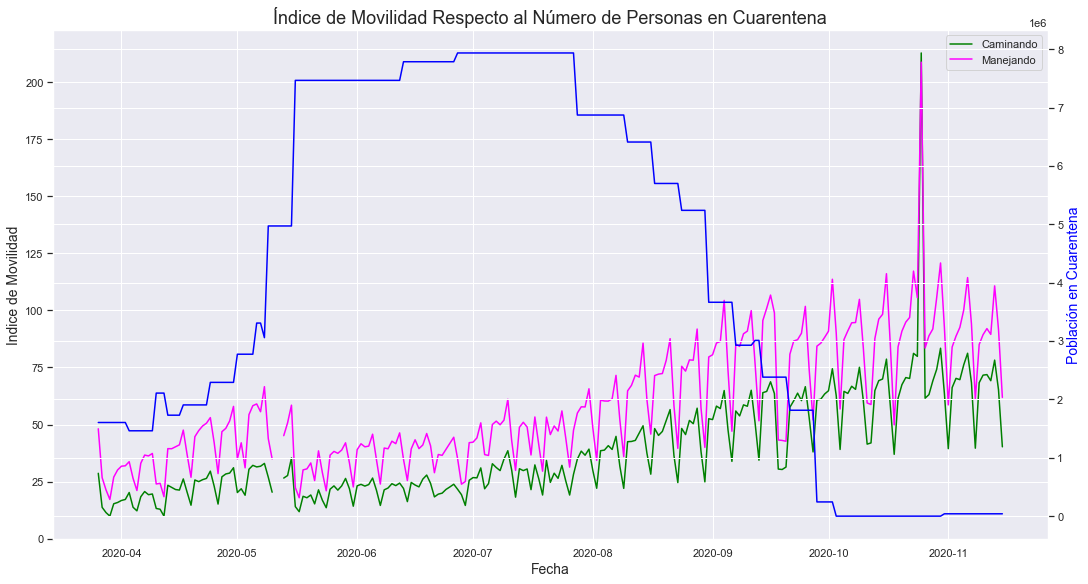

In [292]:
fig,ax = plt.subplots(figsize=(15,8), constrained_layout=True)



ax.plot(movilidad_caminando.Fecha, movilidad_caminando.indice, color ="green")
ax.set_xlabel("Fecha",fontsize=14)

ax.plot(movilidad_manejando.Fecha, movilidad_manejando.indice, color ="Magenta")
ax.set_xlabel("Fecha",fontsize=14)
ax.set_ylabel("Indice de Movilidad",fontsize=14)

ax2=ax.twinx()
ax2.plot(movilidad_cuarentena.Fecha, movilidad_cuarentena.Suma_pob_cuarentena ,color="blue")
ax2.set_ylabel("Población en Cuarentena",color="blue",fontsize=14)
ax.legend(['Caminando', 'Manejando'])
plt.title("Índice de Movilidad Respecto al Número de Personas en Cuarentena", fontsize = 18)
plt.show()

In [294]:
#Se puede observar que en el periodo en que el numero de plblación en cuarentena en la RM es mayor la movilidad tanto como caminando y manejando disminuye.